# **IMPORTING LIBRARIES**
The following libraries are imported to support data analysis and visualization tasks:

- **pandas**: Used for data manipulation and handling structured datasets.
- **matplotlib.pyplot** and **seaborn**: Employed for creating informative visualizations to explore feature distributions and relationships.


In [81]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING AND EXPLORING THE DATASET

The dataset is loaded using `pandas`, followed by basic exploratory commands to view its structure, summary statistics, and initial records. This helps in understanding the overall shape, data types, and potential issues such as missing values or inconsistent formatting.


In [82]:
#Loading the dataset
data = pd.read_csv("Car_prices.csv")

In [83]:
#Display the first 5 rowa
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [84]:
#Display the last 5 rows
data.tail() 


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0
999,1000,590105,779743,5,67295,4,2,8,199,99,96,414938.5


In [85]:
#Describe the dataset
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [86]:
#Display the info of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


# DATA VISUALIZATION #

Data visualization involves diplaying the data using graphs, charts in order to understand the relationship between features, detect the presence of outliers, and better understand the dataset.

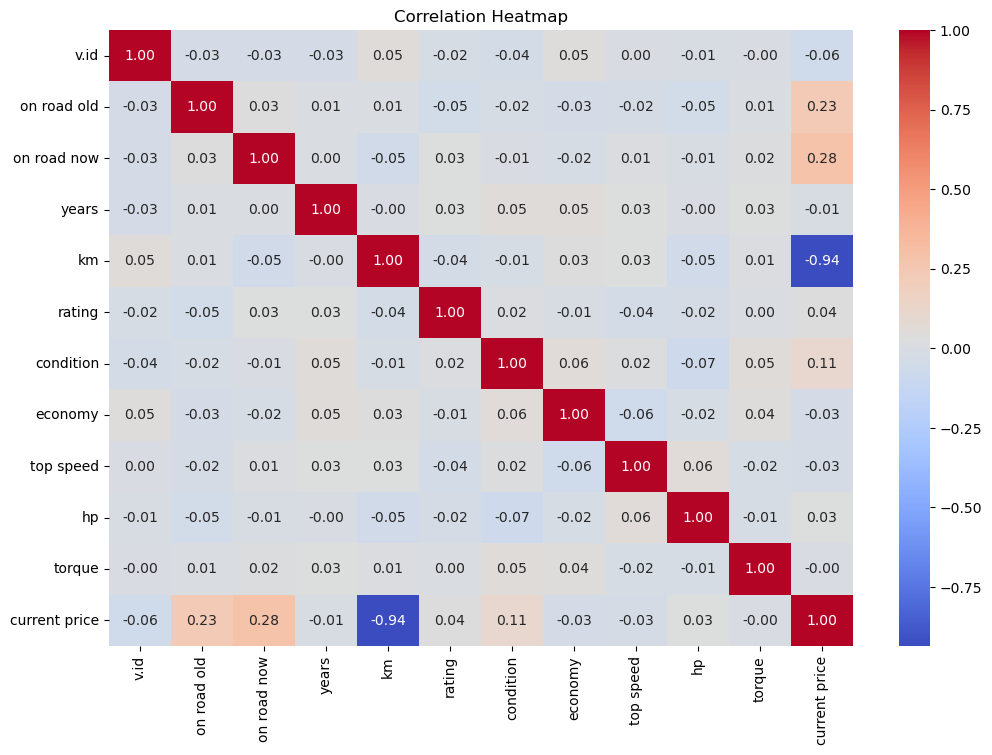

In [87]:
#Correlation heatmap
correlation_matrix = data.corr()

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")

plt.show()

# DATA PREPARATION

In this step, the dataset is cleaned and prepared for modeling. First, a few irrelevant or unclear columns are removed, such as `v.id`, `on road old`, and `on road now`l.

Next, the input features (`X`) and the target variable (`y`) are defined. The target variable `current price` is separated from the dataset, and the remaining features are stored in `X`.

Finally, the dataset is split into training and testing sets using `train_test_split` from `sklearn.model_selection`. This allows the model to be trained on one subset of the data and evaluated on another to assess its generalization performance.
.


In [88]:
#Removing some irrelevant columns
data.drop(['v.id','on road old', 'on road now'], axis=1, inplace=True)

In [89]:
#Extracting features and target
X = data.drop('current price', axis=1)
y = data['current price']

In [90]:
#Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# MODELING PIPELINE
A modeling pipeline using scikit-learn to streamline preprocessing and model training. This ensures that all transformation steps are applied consistently during both training and inference.

## Pipeline Components
The pipeline includes:

**Feature Scaling:** Standardizes the input features using StandardScaler to improve the performance and convergence of the linear model.

**Linear Regression:** A baseline regression algorithm that models the relationship between input features and the target variable by minimizing the residual sum of squares.



In [91]:
#Model selection: LinearRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

#Building a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [92]:
#Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [93]:
#Applying the model
y_pred = pipeline.predict(X_test)

# MODEL EVALUATION

After fitting the pipeline, its performance on the test set is evaluated using standard regression metrics such as Root Mean Squared Error (RMSE), and R² Score. This quantifies both accuracy and generalization capability.

In [94]:
#Evaluating the model
from sklearn.metrics import r2_score, root_mean_squared_error

print(r2_score(y_test, y_pred))

0.8796618313600315


In [95]:
print(root_mean_squared_error(y_test, y_pred))

42533.48379011753


# CONCLUSION

This analysis involved preparing and modeling a car pricing dataset to predict the current market price of vehicles based on various numerical features. The data was cleaned, relevant features were selected, and a machine learning model was trained and evaluated.

The model achieved an **R² score of 0.88** and an **RMSE of approximately 42,533**, indicating that it performs well in capturing price trends, though some error rem, ins—particularly given the wide price range in the dataset.

Overall, the model provides a solid foundation for car price prediction. Further improvements could be explored through feature engineering, advanced modeling techniques, or hyperparameter tuning.

